In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
stock_data = pd.read_csv('stockprice.csv')
stock_data

,datetime,open,high,low,close,volume
0,02-01-1998,38.38,38.63,37.31,37.50,594000
1,05-01-1998,37.63,37.78,36.75,37.13,644000
2,06-01-1998,37.13,37.38,35.56,35.63,1183300
3,07-01-1998,35.50,36.44,34.25,34.69,2039005
4,08-01-1998,34.56,36.01,34.00,35.76,1638105
...,...,...,...,...,...,...
6621,22-02-2024,95.01,96.08,94.14,95.77,4898937
6622,23-02-2024,95.75,96.93,95.58,95.62,4503052
6623,24-02-2024,95.61,95.61,95.59,95.59,6435
6624,26-02-2024,95.30,95.57,94.25,94.30,4151481


In [3]:
stock_data.shape

(6626, 6)

In [4]:
stock_data.size

39756

In [5]:
stock_data.ndim

2

##  EDA( Exploratory data analytics for stock data)

##  Checking null values

In [6]:
stock_data.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

## As there are no null values, we are not applying any treatment for the data set

## Checking duplicate values

In [7]:
stock_data.duplicated().sum()

0

## As there are no duplicated values, we are not applying any treatment for the data set

In [8]:
stock_data.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

## All the values in the data set are proper, so we are not applying any treatment for data set


### Checking the co-relation between the features

<Axes: >

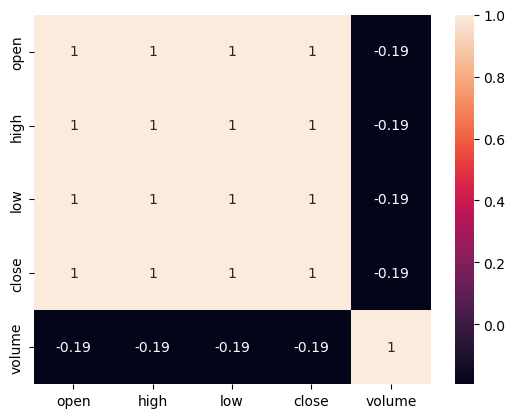

In [9]:
sns.heatmap(stock_data.corr(), annot = True)

### From the above plot, we can coclude that, there exists a  co-relationship between the maximum features

# Checking the outliers

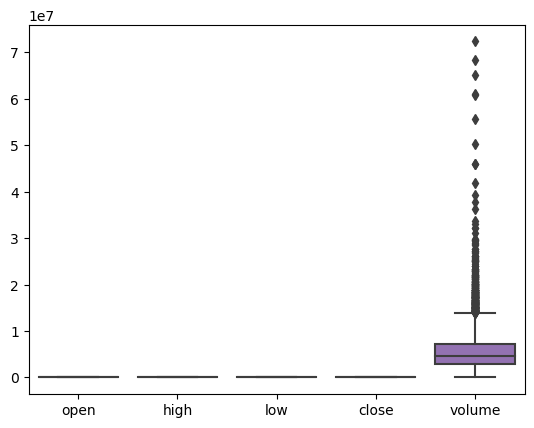

In [10]:
sns.boxplot(data = stock_data)
plt.show()

### There is a outlier for volume column, removing the outlier for volume column

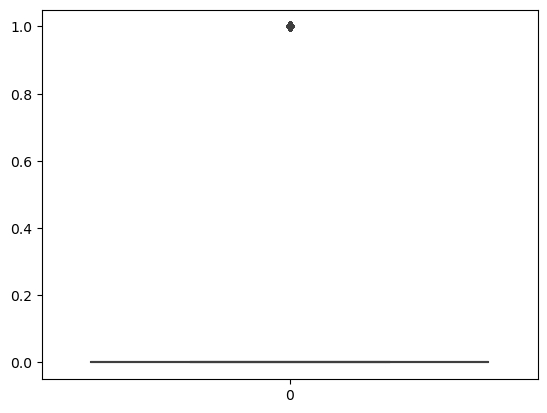

In [11]:
Q1 = stock_data['volume'].quantile(0.25)
Q3 = stock_data['volume'].quantile(0.75)
IQR = Q3 - Q1
Upper_extreme = Q3 + 1.5 * IQR
Lower_extreme = Q1-1.5*IQR
No_outliers = ((stock_data['volume'] > Lower_extreme) & (stock_data['volume'] > Upper_extreme))
sns.boxplot(data = No_outliers)
plt.show()

## Data Visualization




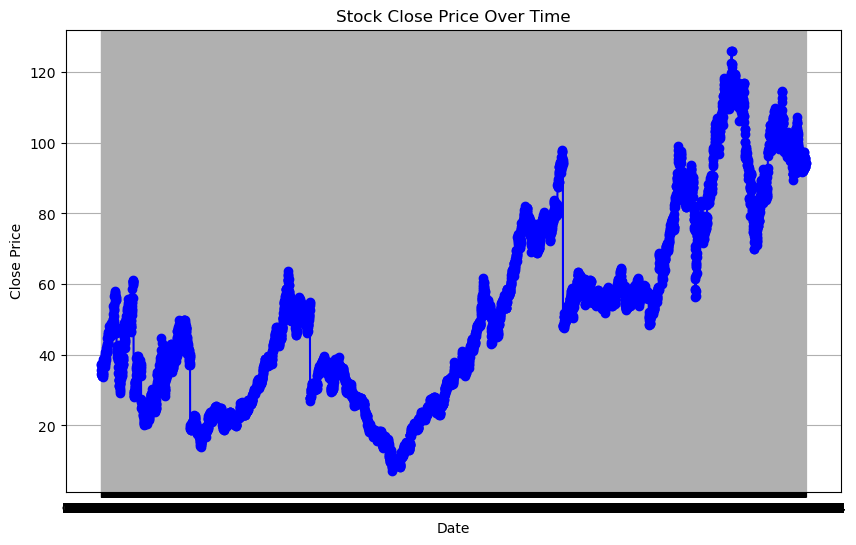

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['datetime'], stock_data['close'], color='blue', marker='o', linestyle='-')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

### From the above graph, we can conclude that closing price is varying with respect to time. we can confirm that,  trend and seasonality exists for stock data set

### Box and whisker plots by intervals

<Figure size 1000x600 with 0 Axes>

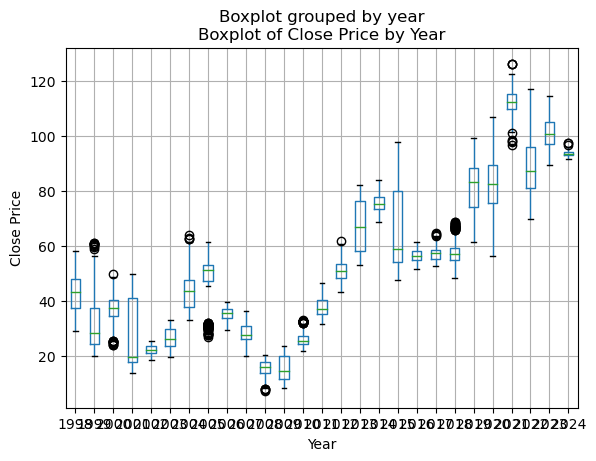

In [13]:
data = pd.read_csv('stockprice.csv')

# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])


data


# Extract year from datetime
data['year'] = data['datetime'].dt.year
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month

data.set_index('datetime', inplace=True)

# Plot boxplot of close price by year
plt.figure(figsize=(10, 6))
data.boxplot(column='close', by='year')
plt.title('Boxplot of Close Price by Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()


### Plotting Auto-co-relation plot Acf plot

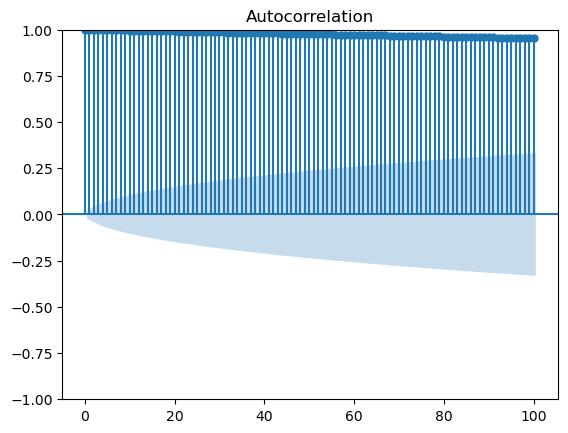

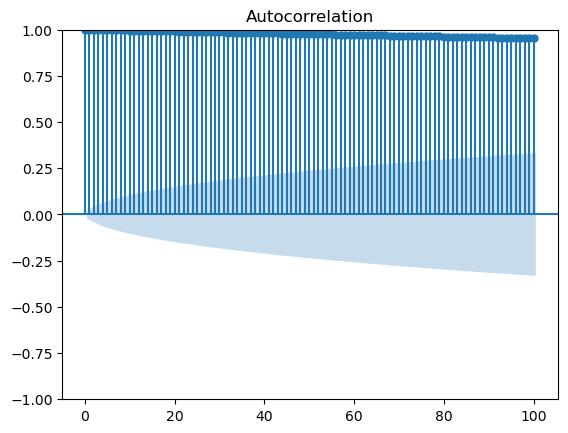

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data

plot_acf(data['year'], lags=100)




In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [17]:
stock_data.describe()

,open,high,low,close,volume
count,6626.000000,6626.000000,6626.000000,6626.000000,6.626000e+03
mean,51.946657,52.525949,51.359537,51.955450,5.797628e+06
std,27.129401,27.281164,26.961618,27.123584,4.661736e+06
min,7.520000,7.900000,7.060000,7.200000,3.000000e+02
25%,29.652500,30.072500,29.032500,29.610000,2.874628e+06
50%,49.150000,49.860000,48.585000,49.250000,4.696046e+06
75%,71.195000,71.947500,70.460000,71.145000,7.310324e+06
max,126.080000,126.320000,124.810000,126.060000,7.234445e+07


<Axes: xlabel='datetime'>

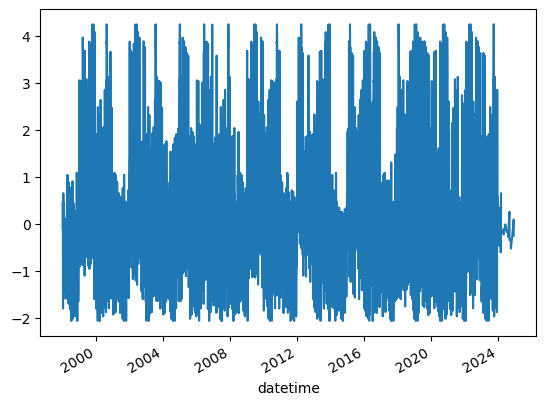

In [18]:
result = seasonal_decompose(data['close'], model='additive', period=365)
result.seasonal.plot()

<Axes: xlabel='datetime'>

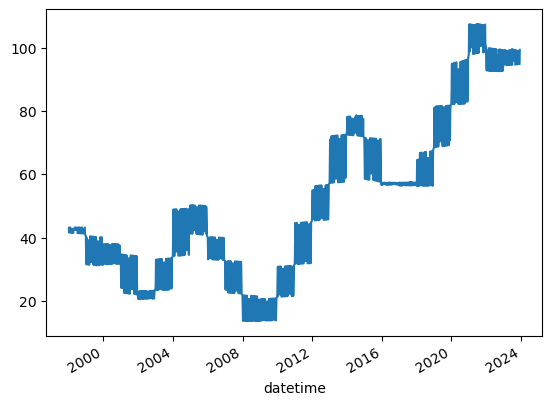

In [19]:
result.trend.plot()

<Axes: xlabel='datetime'>

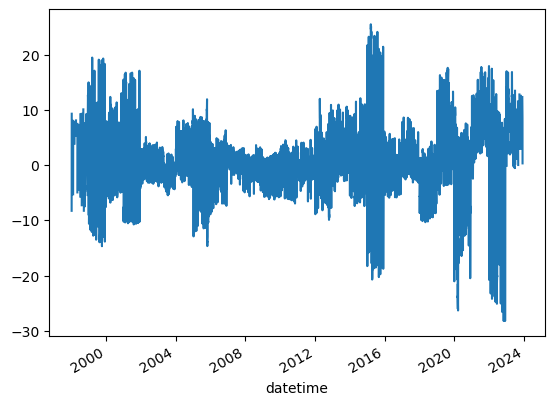

In [20]:
result.resid.plot()

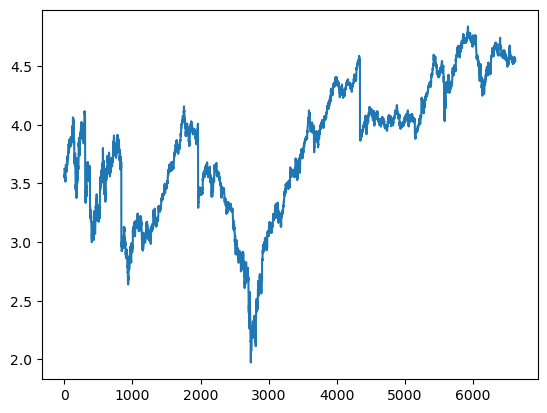

In [21]:
s_data= stock_data['close']
ts_data_log =  np.log(s_data)
plt.plot(ts_data_log)


In [22]:
stock_data

,datetime,open,high,low,close,volume
0,02-01-1998,38.38,38.63,37.31,37.50,594000
1,05-01-1998,37.63,37.78,36.75,37.13,644000
2,06-01-1998,37.13,37.38,35.56,35.63,1183300
3,07-01-1998,35.50,36.44,34.25,34.69,2039005
4,08-01-1998,34.56,36.01,34.00,35.76,1638105
...,...,...,...,...,...,...
6621,22-02-2024,95.01,96.08,94.14,95.77,4898937
6622,23-02-2024,95.75,96.93,95.58,95.62,4503052
6623,24-02-2024,95.61,95.61,95.59,95.59,6435
6624,26-02-2024,95.30,95.57,94.25,94.30,4151481


## Feature Engineering

## calculating daily price change and percentage change

In [23]:
# Calculate daily price change and percent change
data['price_change'] = data['close'] - data['open']
data['percent_change'] = ((data['close'] - data['open']) / data['open']) * 100
data

,open,high,low,close,volume,year,day,month,price_change,percent_change
datetime,,,,,,,,,,
1998-02-01,38.38,38.63,37.31,37.50,594000,1998,1,2,-0.88,-2.292861
1998-05-01,37.63,37.78,36.75,37.13,644000,1998,1,5,-0.50,-1.328727
1998-06-01,37.13,37.38,35.56,35.63,1183300,1998,1,6,-1.50,-4.039860
1998-07-01,35.50,36.44,34.25,34.69,2039005,1998,1,7,-0.81,-2.281690
1998-08-01,34.56,36.01,34.00,35.76,1638105,1998,1,8,1.20,3.472222
...,...,...,...,...,...,...,...,...,...,...
2024-02-22,95.01,96.08,94.14,95.77,4898937,2024,22,2,0.76,0.799916
2024-02-23,95.75,96.93,95.58,95.62,4503052,2024,23,2,-0.13,-0.135770
2024-02-24,95.61,95.61,95.59,95.59,6435,2024,24,2,-0.02,-0.020918


## Calculate average price and volume over a certain period

In [24]:
rolling_window = 5
data['rolling_avg_price'] = data['close'].rolling(window=rolling_window).mean()
data['rolling_avg_volume'] = data['volume'].rolling(window=rolling_window).mean()
data


,open,high,low,close,volume,year,day,month,price_change,percent_change,rolling_avg_price,rolling_avg_volume
datetime,,,,,,,,,,,,
1998-02-01,38.38,38.63,37.31,37.50,594000,1998,1,2,-0.88,-2.292861,NaN,NaN
1998-05-01,37.63,37.78,36.75,37.13,644000,1998,1,5,-0.50,-1.328727,NaN,NaN
1998-06-01,37.13,37.38,35.56,35.63,1183300,1998,1,6,-1.50,-4.039860,NaN,NaN
1998-07-01,35.50,36.44,34.25,34.69,2039005,1998,1,7,-0.81,-2.281690,NaN,NaN
1998-08-01,34.56,36.01,34.00,35.76,1638105,1998,1,8,1.20,3.472222,36.142,1219682.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,95.01,96.08,94.14,95.77,4898937,2024,22,2,0.76,0.799916,94.136,3469384.2
2024-02-23,95.75,96.93,95.58,95.62,4503052,2024,23,2,-0.13,-0.135770,94.618,3712884.0
2024-02-24,95.61,95.61,95.59,95.59,6435,2024,24,2,-0.02,-0.020918,95.092,3713611.4


### Create lag features for closing price and volume to identify co-relation between present and future data

In [25]:
lags = [1, 3, 5]
for lag in lags:
    data[f'close_lag_{lag}'] = data['close'].shift(lag)
    data[f'volume_lag_{lag}'] = data['volume'].shift(lag)
data


,open,high,low,close,volume,year,day,month,price_change,percent_change,rolling_avg_price,rolling_avg_volume,close_lag_1,volume_lag_1,close_lag_3,volume_lag_3,close_lag_5,volume_lag_5
datetime,,,,,,,,,,,,,,,,,,
1998-02-01,38.38,38.63,37.31,37.50,594000,1998,1,2,-0.88,-2.292861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-01,37.63,37.78,36.75,37.13,644000,1998,1,5,-0.50,-1.328727,NaN,NaN,37.50,594000.0,NaN,NaN,NaN,NaN
1998-06-01,37.13,37.38,35.56,35.63,1183300,1998,1,6,-1.50,-4.039860,NaN,NaN,37.13,644000.0,NaN,NaN,NaN,NaN
1998-07-01,35.50,36.44,34.25,34.69,2039005,1998,1,7,-0.81,-2.281690,NaN,NaN,35.63,1183300.0,37.50,594000.0,NaN,NaN
1998-08-01,34.56,36.01,34.00,35.76,1638105,1998,1,8,1.20,3.472222,36.142,1219682.0,34.69,2039005.0,37.13,644000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,95.01,96.08,94.14,95.77,4898937,2024,22,2,0.76,0.799916,94.136,3469384.2,95.01,5240192.0,93.22,2798.0,93.23,4619612.0
2024-02-23,95.75,96.93,95.58,95.62,4503052,2024,23,2,-0.13,-0.135770,94.618,3712884.0,95.77,4898937.0,93.47,3919441.0,93.21,3285553.0
2024-02-24,95.61,95.61,95.59,95.59,6435,2024,24,2,-0.02,-0.020918,95.092,3713611.4,95.62,4503052.0,95.01,5240192.0,93.22,2798.0


### Scaling the numerical features

In [26]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['open', 'high', 'low', 'close', 'volume']

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [27]:
data

,open,high,low,close,volume,year,day,month,price_change,percent_change,rolling_avg_price,rolling_avg_volume,close_lag_1,volume_lag_1,close_lag_3,volume_lag_3,close_lag_5,volume_lag_5
datetime,,,,,,,,,,,,,,,,,,
1998-02-01,-0.500110,-0.509399,-0.521133,-0.532988,-1.116327,1998,1,2,-0.88,-2.292861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-01,-0.527757,-0.540558,-0.541905,-0.546630,-1.105600,1998,1,5,-0.50,-1.328727,NaN,NaN,37.50,594000.0,NaN,NaN,NaN,NaN
1998-06-01,-0.546189,-0.555222,-0.586045,-0.601937,-0.989905,1998,1,6,-1.50,-4.039860,NaN,NaN,37.13,644000.0,NaN,NaN,NaN,NaN
1998-07-01,-0.606276,-0.589680,-0.634637,-0.636596,-0.806332,1998,1,7,-0.81,-2.281690,NaN,NaN,35.63,1183300.0,37.50,594000.0,NaN,NaN
1998-08-01,-0.640927,-0.605443,-0.643910,-0.597144,-0.892336,1998,1,8,1.20,3.472222,36.142,1219682.0,34.69,2039005.0,37.13,644000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,1.587451,1.596608,1.586837,1.615489,-0.192795,2024,22,2,0.76,0.799916,94.136,3469384.2,95.01,5240192.0,93.22,2798.0,93.23,4619612.0
2024-02-23,1.614730,1.627768,1.640250,1.609959,-0.277723,2024,23,2,-0.13,-0.135770,94.618,3712884.0,95.77,4898937.0,93.47,3919441.0,93.21,3285553.0
2024-02-24,1.609569,1.579379,1.640621,1.608852,-1.242376,2024,24,2,-0.02,-0.020918,95.092,3713611.4,95.62,4503052.0,95.01,5240192.0,93.22,2798.0


In [28]:
# Forward fill missing values
data.fillna(method='bfill', inplace=True)

data


,open,high,low,close,volume,year,day,month,price_change,percent_change,rolling_avg_price,rolling_avg_volume,close_lag_1,volume_lag_1,close_lag_3,volume_lag_3,close_lag_5,volume_lag_5
datetime,,,,,,,,,,,,,,,,,,
1998-02-01,-0.500110,-0.509399,-0.521133,-0.532988,-1.116327,1998,1,2,-0.88,-2.292861,36.142,1219682.0,37.50,594000.0,37.50,594000.0,37.50,594000.0
1998-05-01,-0.527757,-0.540558,-0.541905,-0.546630,-1.105600,1998,1,5,-0.50,-1.328727,36.142,1219682.0,37.50,594000.0,37.50,594000.0,37.50,594000.0
1998-06-01,-0.546189,-0.555222,-0.586045,-0.601937,-0.989905,1998,1,6,-1.50,-4.039860,36.142,1219682.0,37.13,644000.0,37.50,594000.0,37.50,594000.0
1998-07-01,-0.606276,-0.589680,-0.634637,-0.636596,-0.806332,1998,1,7,-0.81,-2.281690,36.142,1219682.0,35.63,1183300.0,37.50,594000.0,37.50,594000.0
1998-08-01,-0.640927,-0.605443,-0.643910,-0.597144,-0.892336,1998,1,8,1.20,3.472222,36.142,1219682.0,34.69,2039005.0,37.13,644000.0,37.50,594000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,1.587451,1.596608,1.586837,1.615489,-0.192795,2024,22,2,0.76,0.799916,94.136,3469384.2,95.01,5240192.0,93.22,2798.0,93.23,4619612.0
2024-02-23,1.614730,1.627768,1.640250,1.609959,-0.277723,2024,23,2,-0.13,-0.135770,94.618,3712884.0,95.77,4898937.0,93.47,3919441.0,93.21,3285553.0
2024-02-24,1.609569,1.579379,1.640621,1.608852,-1.242376,2024,24,2,-0.02,-0.020918,95.092,3713611.4,95.62,4503052.0,95.01,5240192.0,93.22,2798.0


### Ducky-fuller test to check whether the data has stationality or not

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 7).mean()
    rolstd = timeseries.rolling(window = 7).std()
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')




    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.513532
p-value                           0.526807
#Lags Used                        9.000000
Number of Observations Used    6616.000000
Critical Value (1%)              -3.431339
Critical Value (5%)              -2.861977
Critical Value (10%)             -2.567003
dtype: float64


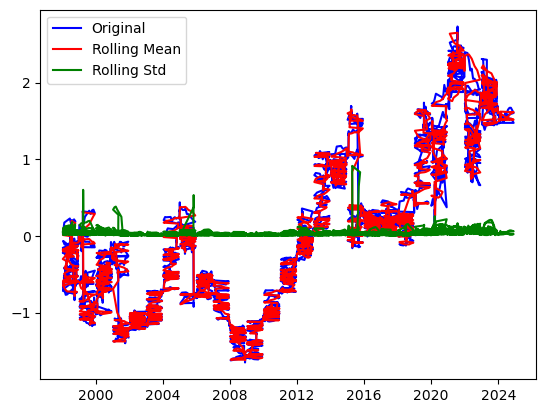

In [31]:
test_stationarity(data['close'])

### From the above test, we can conclude that data is staionality because p is greater than alpha value
### if we assume alpha value as 0.05, p>alpha so according to hypothesis testing we will reject Ho.
### Data is stationality

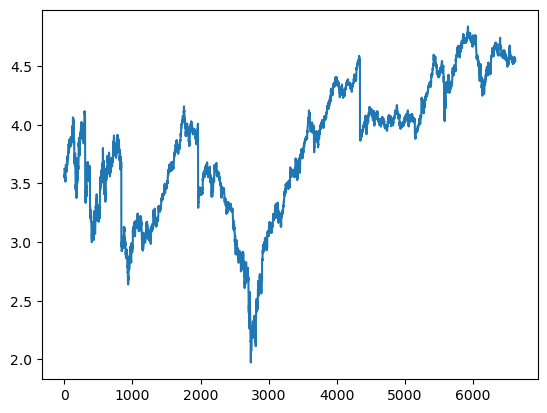

In [32]:
plt.plot(ts_data_log)

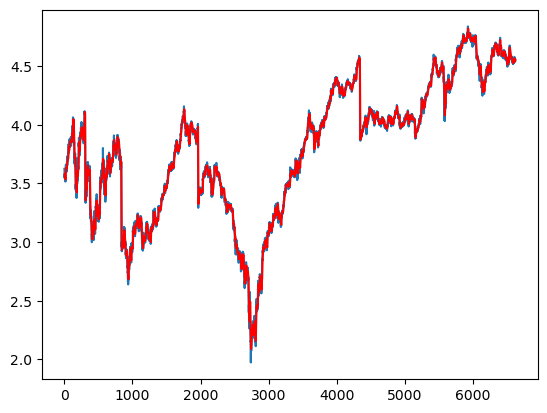

In [33]:
movingAverage = ts_data_log.rolling(window = 7).mean()
movingSTD = ts_data_log.rolling(window = 7).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [34]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6    -0.018531
7    -0.000483
8    -0.003277
9    -0.030988
10   -0.026607
11    0.002216
12   -0.017114
13   -0.009737
14    0.008048
Name: close, dtype: float64

In [35]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.head()

6    -0.018531
7    -0.000483
8    -0.003277
9    -0.030988
10   -0.026607
Name: close, dtype: float64

Results of Dickey-Fuller Test :

Test Statistic                  -24.085609
p-value                           0.000000
#Lags Used                        9.000000
Number of Observations Used    6610.000000
Critical Value (1%)              -3.431340
Critical Value (5%)              -2.861977
Critical Value (10%)             -2.567003
dtype: float64


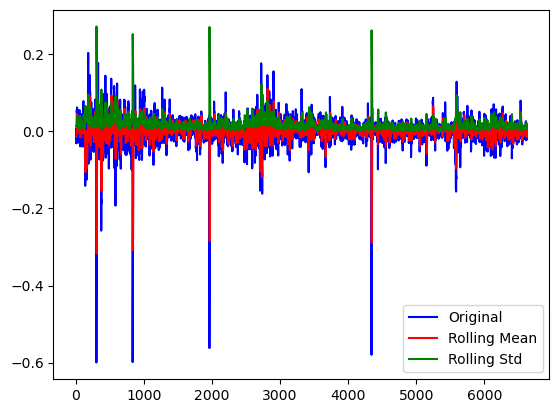

In [36]:
test_stationarity(ts_data_log_diff)

### From differencing method we can conclude that, data is non-stationality since p value is less than alpha

### We have to give stationality data for the model building, I will go with ducky-fuller test, from this test I got result as stationality data

### Model Building

In [37]:
data

,open,high,low,close,volume,year,day,month,price_change,percent_change,rolling_avg_price,rolling_avg_volume,close_lag_1,volume_lag_1,close_lag_3,volume_lag_3,close_lag_5,volume_lag_5
datetime,,,,,,,,,,,,,,,,,,
1998-02-01,-0.500110,-0.509399,-0.521133,-0.532988,-1.116327,1998,1,2,-0.88,-2.292861,36.142,1219682.0,37.50,594000.0,37.50,594000.0,37.50,594000.0
1998-05-01,-0.527757,-0.540558,-0.541905,-0.546630,-1.105600,1998,1,5,-0.50,-1.328727,36.142,1219682.0,37.50,594000.0,37.50,594000.0,37.50,594000.0
1998-06-01,-0.546189,-0.555222,-0.586045,-0.601937,-0.989905,1998,1,6,-1.50,-4.039860,36.142,1219682.0,37.13,644000.0,37.50,594000.0,37.50,594000.0
1998-07-01,-0.606276,-0.589680,-0.634637,-0.636596,-0.806332,1998,1,7,-0.81,-2.281690,36.142,1219682.0,35.63,1183300.0,37.50,594000.0,37.50,594000.0
1998-08-01,-0.640927,-0.605443,-0.643910,-0.597144,-0.892336,1998,1,8,1.20,3.472222,36.142,1219682.0,34.69,2039005.0,37.13,644000.0,37.50,594000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,1.587451,1.596608,1.586837,1.615489,-0.192795,2024,22,2,0.76,0.799916,94.136,3469384.2,95.01,5240192.0,93.22,2798.0,93.23,4619612.0
2024-02-23,1.614730,1.627768,1.640250,1.609959,-0.277723,2024,23,2,-0.13,-0.135770,94.618,3712884.0,95.77,4898937.0,93.47,3919441.0,93.21,3285553.0
2024-02-24,1.609569,1.579379,1.640621,1.608852,-1.242376,2024,24,2,-0.02,-0.020918,95.092,3713611.4,95.62,4503052.0,95.01,5240192.0,93.22,2798.0


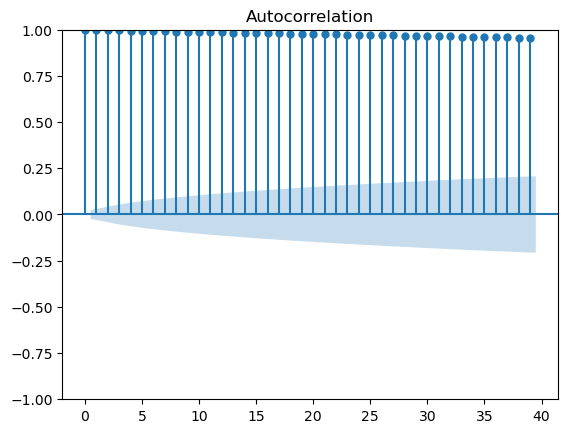

In [38]:
plot_acf(data['close'])
plt.show()


In [39]:
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF
acf_values = acf(data['close'], nlags=10)  # Set nlags to the maximum lag you want to consider

# Print ACF values
print(acf_values)

[1.         0.99864739 0.99738761 0.99610674 0.99484195 0.9936031
 0.99238502 0.99120116 0.98998222 0.9888689  0.98769284]


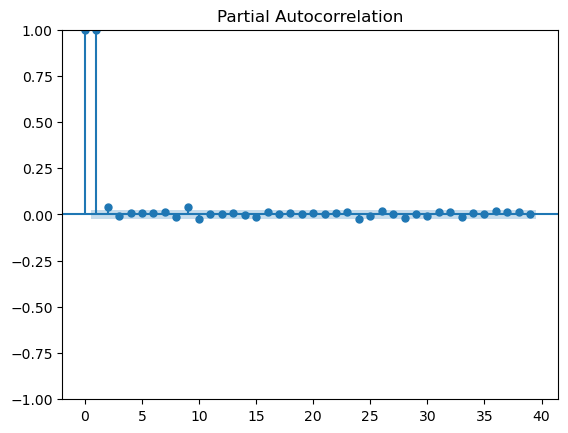

In [40]:
plot_pacf(data['close'])
plt.show()

In [41]:
# Calculate pCF
pcf_values = pacf(data['close'], nlags=10)  # Set nlags to the maximum lag you want to consider

# Print pCF values
print(pcf_values)

[ 1.          0.99879813  0.03790408 -0.00800763  0.00536877  0.01066711
  0.00871704  0.01416195 -0.01419959  0.04237135 -0.02295872]


### From the above pcf list, we can consider q value as 3 0r 4 at this particular point of lag, value is decreasing

### Since I didnt get exact p value from a pacf plot as all the values are close to 1
### Finding p value from this below stepm

In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Try different values of p and fit ARIMA models
for p_value in range(1, 11):  # Try values from 1 to 10
    try:
        model = ARIMA(data['close'], order=(p_value, 0, 0))  # Assuming no differencing for simplicity
        results = model.fit()
        print(f"AIC for p={p_value}: {results.aic}")
    except:
        print(f"Error occurred for p={p_value}")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=1: 40804.05302471061


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=2: 40663.622476253026


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=3: 40577.1463748276


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=4: 40493.33064064608


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=5: 40404.42893279382


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=6: 40301.02088132711


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=7: 40251.93880679119


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=8: 40211.47153161421


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=9: 40172.52904275891


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC for p=10: 40141.49184773985


## From the above set of p values I will consider p value as 1

In [ ]:
# Fit ARIMA model
model = ARIMA(data['close'], order=(1, 0, 2))  # You need to determine p, d, and q
results = model.fit()

# Evaluate the model
print(results.summary())
plt.show()

In [44]:
# Forecasting
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)
forecast

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


6626    1.554476
6627    1.553052
6628    1.551644
6629    1.550237
6630    1.548832
6631    1.547428
6632    1.546026
6633    1.544624
6634    1.543224
6635    1.541825
6636    1.540427
6637    1.539031
6638    1.537636
6639    1.536242
6640    1.534850
6641    1.533458
6642    1.532068
6643    1.530680
6644    1.529292
6645    1.527906
6646    1.526521
6647    1.525137
6648    1.523755
6649    1.522373
6650    1.520993
6651    1.519615
6652    1.518237
6653    1.516861
6654    1.515486
6655    1.514112
Name: predicted_mean, dtype: float64

#### close price prediction for the next 30 days has been predicted, but we cant know the accuracy of the model
#### In order to measure performance of the model, we will train the model, splitting the data for training and testing

In [45]:
# Set the training size to 80% of the dataset
train_size = int(len(data) * 0.8)

# Split the data into training and testing sets
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Print the sizes of training and testing sets
print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))

Training data size: 5300
Testing data size: 1326


In [58]:
from sklearn.metrics import mean_squared_error

model = ARIMA(train_data['close'], order=(1, 0, 2))
model_fit = model.fit()

# Make forecasts for the next 30 days using the fitted model
forecast = model_fit.forecast(steps=30)

# Get the actual closing prices for the next 30 days from the testing data
actual_prices = test_data['close'].values[:30]  # Assuming 'close' is the column name for closing prices

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(actual_prices, forecast)
print("Mean Squared Error:", mse)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 258.27756598803944


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### we got mean squared error as 0.02015, from this we can conclude that the error is very less, actual closing price
### is matching with prediction price and model is performing better

In [59]:
forecast_df = pd.DataFrame(forecast)
forecast_df

,predicted_mean
5300,66.507937
5301,65.487433
5302,65.227762
5303,64.970912
5304,64.716852
5305,64.465552
5306,64.216982
5307,63.971112
5308,63.727913
5309,63.487356


In [48]:
forecast_df.rename(columns={'predicted_mean': 'predicted_values'}, inplace=True)

# If you want to reset the index as well
forecast_df.reset_index(inplace=True, drop=True)

forecast_df

,predicted_values
0,0.556156
1,0.552553
2,0.550789
3,0.549027
4,0.547269
5,0.545515
6,0.543763
7,0.542015
8,0.540271
9,0.538529


In [49]:
actual_prices_df = pd.DataFrame(actual_prices)

actual_prices_df.rename(columns={0: 'actual_values'}, inplace=True)

# If you want to reset the index as well
actual_prices_df.reset_index(inplace=True, drop=True)

actual_prices_df

,actual_values
0,0.551390
1,0.555446
2,0.597110
3,0.557658
4,0.594529
5,0.576094
6,0.642830
7,0.622551
8,0.633981
9,0.656473


In [50]:
result = pd.concat([actual_prices_df, forecast_df], axis=1)
result


,actual_values,predicted_values
0,0.551390,0.556156
1,0.555446,0.552553
2,0.597110,0.550789
3,0.557658,0.549027
4,0.594529,0.547269
5,0.576094,0.545515
6,0.642830,0.543763
7,0.622551,0.542015
8,0.633981,0.540271
9,0.656473,0.538529


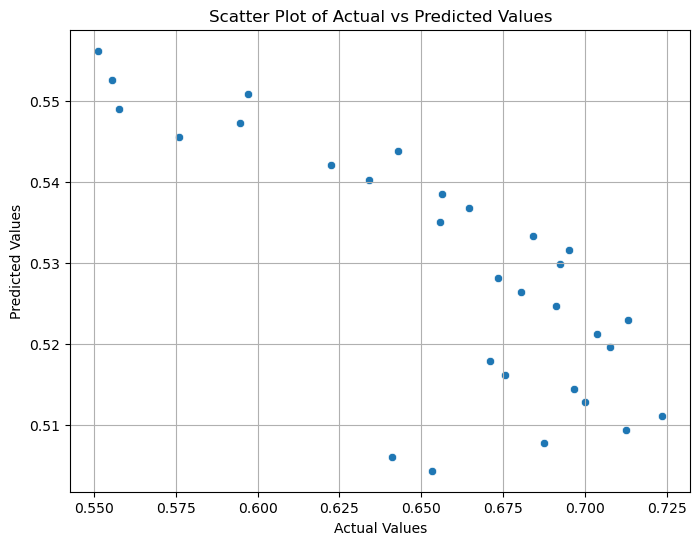

In [51]:
import seaborn as sns

# Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=result, x='actual_values', y='predicted_values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


### From the above scatter plot we can conclude that, actual values are almost matching with predicted values

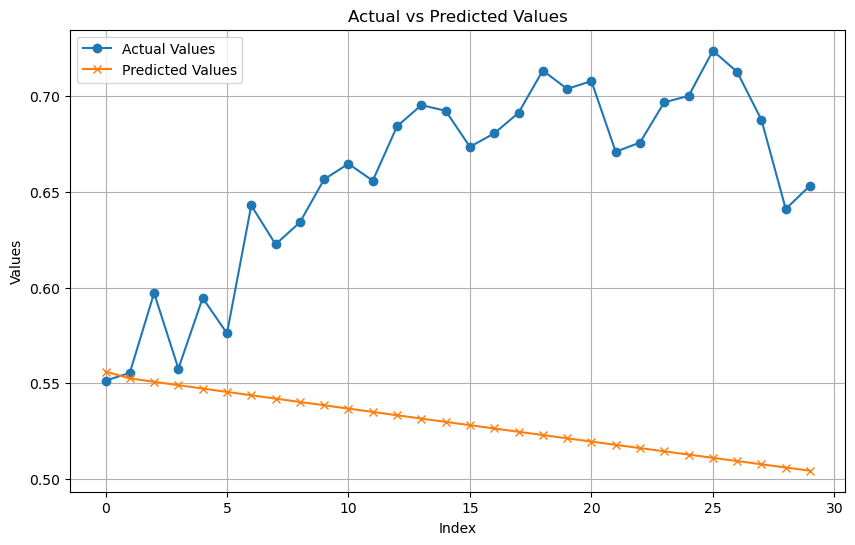

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(result.index, result['actual_values'], label='Actual Values', marker='o')
plt.plot(result.index, result['predicted_values'], label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

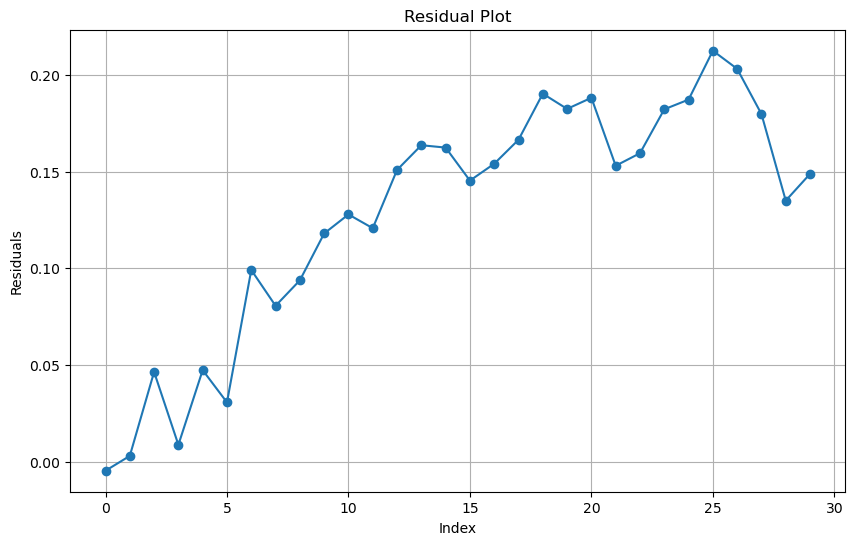

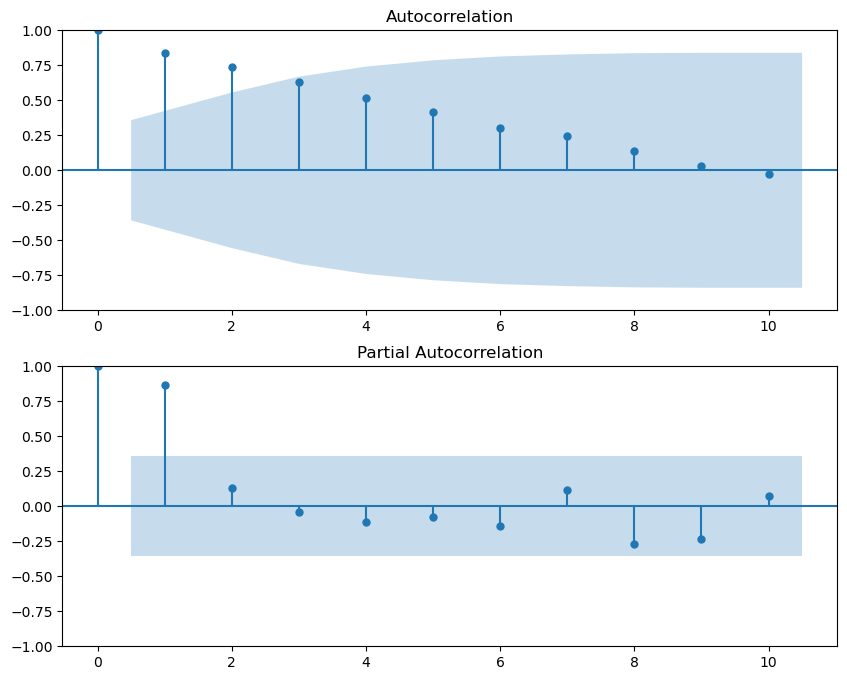

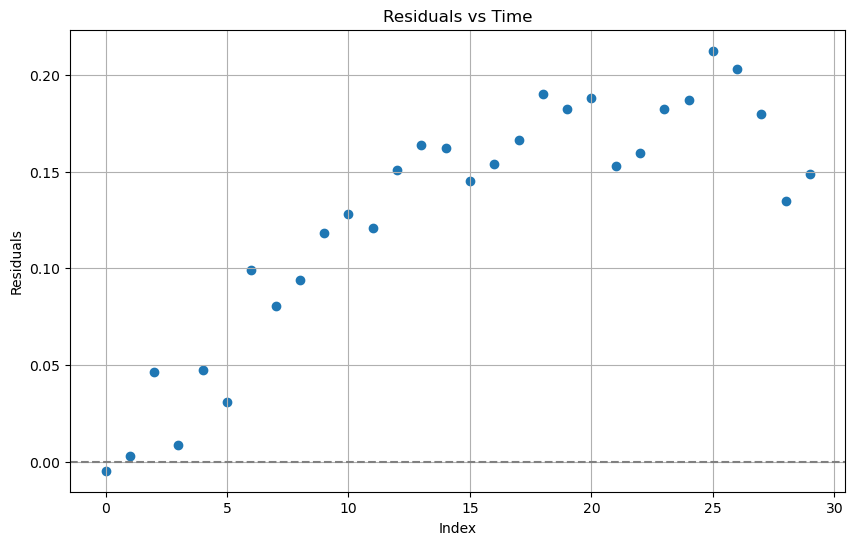

In [53]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Calculate residuals
residuals = result['actual_values'] - result['predicted_values']

# Step 2: Visualize residuals
plt.figure(figsize=(10, 6))
plt.plot(result.index, residuals, marker='o', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Step 3: Check for autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(residuals, lags=10, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=10, ax=ax[1])

plt.show()

# Step 4: Assess heteroscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(result.index, residuals, marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residuals vs Time')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


### The ARIMA model achieved a Mean Squared Error (MSE) of approximately 0.0287.
### This metric indicates the average squared difference between the actual and predicted values,
### with lower values indicating better predictive performance. Therefore, the ARIMA model seems to
### provide relatively accurate forecasts for the given time series data.

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Data Preprocessing
data = pd.read_csv('stockprice.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values(by='datetime')

# Step 2: Feature Engineering
# For simplicity, we'll use only 'open', 'high', 'low', 'volume' as features
features = data[['open', 'high', 'low', 'volume']].values

# Step 3: Splitting Data
split_index = int(len(data) * 0.8)  # 80% train, 20% test
train_data, test_data = data[:split_index], data[split_index:]

# Step 4: Prepare Training Data
X_train = train_data[['open', 'high', 'low', 'volume']].values
y_train = train_data['close'].values
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM

# Step 5: Prepare Testing Data
X_test = test_data[['open', 'high', 'low', 'volume']].values
y_test = test_data['close'].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape for LSTM

# Step 6: Model Training
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Step 7: Model Evaluation (Optional)
# Evaluate the model on the test data and make predictions
# Evaluate the model's performance using appropriate metrics

y_pred = model.predict(X_test)

# Evaluate the model's performance using appropriate metrics
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Data:", mse)


Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3311788288.0000
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 40502.3359
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1511.3514
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1535.0724
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1486.4785
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1495.5900
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1550.6847
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1612.8405
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1568.2023
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1828.5492
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1801.8906
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2293.6035
Epoch 13/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1861.5433
Epoch 14/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1651

KeyboardInterrupt: 

## From the above two models ie arima lstm, arima model got less mse value
## when compared to lstm model, we will choose arima model for close price
## prediction. we will deploy arima model building code.